[View in Colaboratory](https://colab.research.google.com/github/peaelle42/DNN_jump_start/blob/master/Collab_Crash_Course.ipynb)

## Colab Crash Course

Open in this notebook in Colab

https://colab.research.google.com/samwit/colab_crash_course/file1


Once opened in Colab you can copy it to your own Google Drive by selecting "COPY TO DRIVE"



Colab has many advantages for both people who are new to Python/Jupyter Notebook stack as well as to those well versed in using Jupyter.

I have made this set of notebooks to show how to navigate some of the differences between Jupyter Notebooks and Colab Notebook 


Colab operates in its own virtual environment 




## Downloading files

In [0]:
!wget -qq https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png

## Display Images

In [0]:
from IPython.display import Image


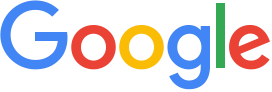

In [3]:
Image('googlelogo_color_272x92dp.png')

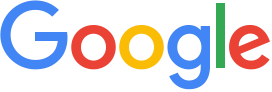

In [4]:
Image("googlelogo_color_272x92dp.png", width=100, height=100)

## Navigation 

### Checking whats in the directory

In [5]:
!ls

datalab  googlelogo_color_272x92dp.png


In [0]:
#removing a file
!rm googlelogo_color_272x92dp.png

In [8]:
!ls

datalab


### Changing the directory

In [0]:
# change dir
!cd datalab

In [10]:
!ls

datalab


### Making a directory

In [0]:
#make a folder
!mkdir test01

In [12]:
!ls

datalab  test01


In [0]:
!cd test01

In [0]:
!ls

datalab  googlelogo_color_272x92dp.png	test01


In [0]:
!ls test01

In [0]:
!cd ..

## Uploading files From Local Drive

In [13]:
from google.colab import files
files.upload()
# choose the file on your computer to upload it then


{}

In [0]:
%load data.py

## Google Drive Setup

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

### Loading a dataset from Google Drive

For full examples from Google:
https://colab.research.google.com/notebook#fileId=/v2/external/notebooks/io.ipynb&scrollTo=s6nDq8Nk7aPN

In [0]:
## Loading Data to Google Drive

# Download the file we just uploaded.
#
# Replace the assignment below with your file ID
# to download a different file.
#
# A file ID looks like: 1uBtlaggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '13iMF6PEsmZRKLVtK13Cb0KkDnGcHDyNO'

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

downloaded.seek(0)
print('Downloaded file contents are: {}'.format(downloaded.read()))


Downloaded file contents are: b'my sample file'


### Saving Data to Google Drive

In [0]:
# Create a local file to upload.
with open('/tmp/to_upload.txt', 'w') as f:
  f.write('my sample file')

print('/tmp/to_upload.txt contains:')
!cat /tmp/to_upload.txt

In [0]:
# Upload the file to Drive. See:
#
# https://developers.google.com/drive/v3/reference/files/create
# https://developers.google.com/drive/v3/web/manage-uploads
from googleapiclient.http import MediaFileUpload

file_metadata = {
  'name': 'Sample file',
  'mimeType': 'text/plain'
}

media = MediaFileUpload('/tmp/to_upload.txt', 
                        mimetype='text/plain',
                        resumable=True)

created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()
print('File ID: {}'.format(created.get('id')))

## Downgrading to a previous version of TensorFlow

In [0]:
#!pip uninstall tensorflow-gpu

In [0]:
#!pip install tensorflow-gpu==1.9.0

## Killing the entire virtual environment so you can start again

In [0]:
!kill -9 -1